# Exploration of New York City's fire department

 Group members: Andrés Ísak Hlynsson (s242978), Þorvaldur Lúðvíksson (s242975)

## 1. Motivation

The dataset that we have chosen for this particular project contains information related to the New York city's fire department. The group was eager to analyze New York's firefighter scene, especially how the city's boroughs compare to one another in response time, amount of incidents and so fourth. This dataset therefore happens to fit perfectly with our project because it contains detailed information about the instances in which New York's firefighters were called out, such as response type, incident type, ZIP-codes, inital and final call type, just to name a few. The dataset is quite vast but do to it's massive size the group has decided to limit the dataset to instances which occured from 2016 until present time. Our goal is to give the end user a very clear picture of how New York's boroughs stack up against one another regarding  the firefighters performance (response time) within each borough as well as providing a detailed analysis of incident types and amount of incident types that occur within each borough which might give some safety indications for the boroughs.

In [6]:
import pandas as pd
file_path = r"C:\Users\andre\JN\EMS_Incident_Dispatch_Data_20250507.csv"
df = pd.read_csv(file_path)
print("Rows and columns:", df.shape)
df.head()

Rows and columns: (14207289, 31)


,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,...,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,COMMUNITYSCHOOLDISTRICT,CONGRESSIONALDISTRICT,REOPEN_INDICATOR,SPECIAL_EVENT_INDICATOR,STANDBY_INDICATOR,TRANSFER_INDICATOR
0,160010001,01/01/2016 12:00:17 AM,OTHER,6,OTHER,6,NaN,N,0,NaN,...,11201.0,84.0,33.0,302.0,13.0,8.0,N,N,N,N
1,160010002,01/01/2016 12:00:18 AM,SICK,6,SICK,6,01/01/2016 12:01:29 AM,Y,71,01/01/2016 12:01:42 AM,...,10469.0,47.0,12.0,212.0,11.0,16.0,N,N,N,N
2,160010004,01/01/2016 12:01:28 AM,UNC,2,UNC,2,01/01/2016 12:02:21 AM,Y,53,01/01/2016 12:03:09 AM,...,10002.0,7.0,1.0,103.0,1.0,7.0,N,N,N,N
3,160010005,01/01/2016 12:01:32 AM,SICK,6,SICK,6,01/01/2016 12:02:11 AM,Y,39,01/01/2016 12:02:21 AM,...,11374.0,112.0,29.0,406.0,28.0,6.0,N,N,N,N
4,160010007,01/01/2016 12:02:18 AM,INJURY,5,INJURY,5,01/01/2016 12:02:56 AM,Y,38,01/01/2016 12:03:04 AM,...,10456.0,44.0,8.0,204.0,9.0,15.0,N,N,N,N


## 2. Basic stats

The data cleaning involves changing certain specialized coulumns into datetime format, removing columns from the dataset which will not be necessary during the preoject, and then removing all rows which include missing values. The exploratory data analysis did also provide us with some valuable insights, for example it is quite clear that the borough which has the quickest response time on average is Richmond/Staten Island and it also has the shortest travel time to were the incidents occured. Performing second best in these three metrics (dispatch response time, incident response time and travel time) is Queens, Manhattan performs the worst for dispatch response time and Bronx seems to perform the worst both for incident response time as well as travel time. There are two lists below which show the top as well as bottom 30 ZIP-codes according to amount of instances which occured in those areas. The top 30 list is spread fairly evenly among the follwing three boroughs: Brooklyn, Bronx and Manhattan. However for the bottom 30 ZIP-codes it is quite a different story in that Manhattan dominates that list.

In [7]:
# Cleaning the data


columns_to_keep = [
    'INCIDENT_DATETIME', 'INITIAL_CALL_TYPE', 'INITIAL_SEVERITY_LEVEL_CODE',
    'FINAL_CALL_TYPE', 'FINAL_SEVERITY_LEVEL_CODE', 'FIRST_ASSIGNMENT_DATETIME',
    'VALID_DISPATCH_RSPNS_TIME_INDC', 'DISPATCH_RESPONSE_SECONDS_QY',
    'FIRST_ACTIVATION_DATETIME', 'FIRST_ON_SCENE_DATETIME',
    'VALID_INCIDENT_RSPNS_TIME_INDC', 'INCIDENT_RESPONSE_SECONDS_QY',
    'INCIDENT_TRAVEL_TM_SECONDS_QY', 'FIRST_TO_HOSP_DATETIME',
    'FIRST_HOSP_ARRIVAL_DATETIME', 'INCIDENT_CLOSE_DATETIME',
    'BOROUGH', 'ZIPCODE'
]
df = df[columns_to_keep]
date_cols = [col for col in df.columns if 'DATETIME' in col.upper()]
date_format = "%m/%d/%Y %I:%M:%S %p"
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format=date_format, errors='coerce')
df.dropna(inplace=True)
df = df[df['BOROUGH'] != 'UNKNOWN']
df.reset_index(drop=True, inplace=True)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns  

time_cols = [
    'DISPATCH_RESPONSE_SECONDS_QY',
    'INCIDENT_RESPONSE_SECONDS_QY',
    'INCIDENT_TRAVEL_TM_SECONDS_QY'
]

# Calculating average times by BOROUGH
borough_avg = df.groupby('BOROUGH')[time_cols].mean().round(2)
print("=== Average Times by Borough ===")
print(borough_avg)

# ZIP-counts
zip_counts = df['ZIPCODE'].value_counts()

# Get top 30 and bottom 30 ZIP codes
top_30_zips = zip_counts.head(30).index
bottom_30_zips = zip_counts.tail(30).index

# Compute average times for top 30 ZIPs
zip_avg_top30 = df[df['ZIPCODE'].isin(top_30_zips)].groupby('ZIPCODE')[time_cols].mean().round(2)

# Compute average times for bottom 30 ZIPs
zip_avg_bottom30 = df[df['ZIPCODE'].isin(bottom_30_zips)].groupby('ZIPCODE')[time_cols].mean().round(2)


print("\n=== Average Times for Top 30 ZIP Codes (Most Incidents) ===")
print(zip_avg_top30)

print("\n=== Average Times for Bottom 30 ZIP Codes (Fewest Incidents) ===")
print(zip_avg_bottom30)


=== Average Times by Borough ===
                          DISPATCH_RESPONSE_SECONDS_QY  \
BOROUGH                                                  
BRONX                                           120.42   
BROOKLYN                                         62.95   
MANHATTAN                                       121.96   
QUEENS                                           47.38   
RICHMOND / STATEN ISLAND                         38.61   

                          INCIDENT_RESPONSE_SECONDS_QY  \
BOROUGH                                                  
BRONX                                           639.29   
BROOKLYN                                        571.94   
MANHATTAN                                       626.83   
QUEENS                                          528.22   
RICHMOND / STATEN ISLAND                        483.42   

                          INCIDENT_TRAVEL_TM_SECONDS_QY  
BOROUGH                                                  
BRONX                                

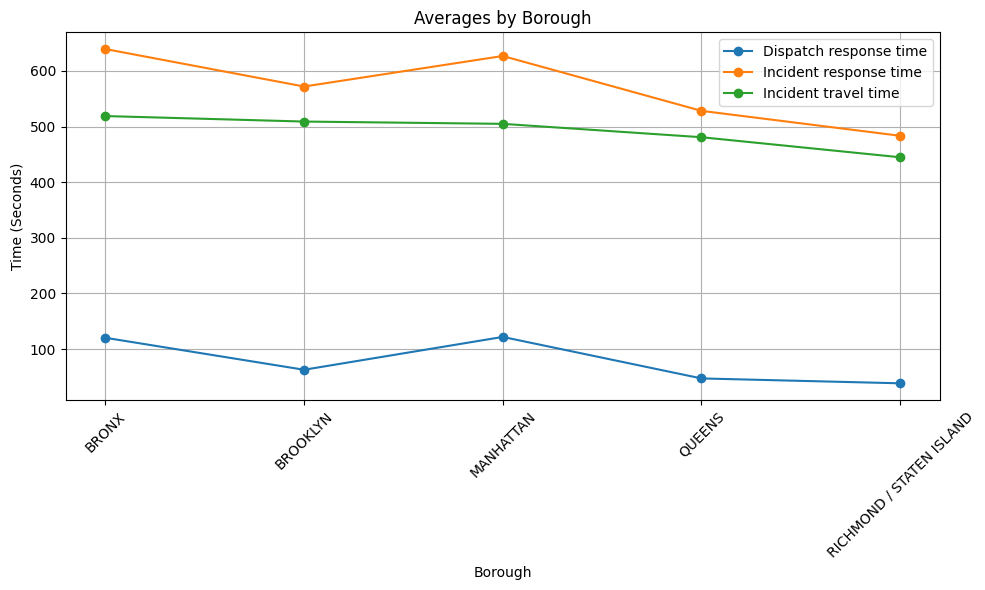

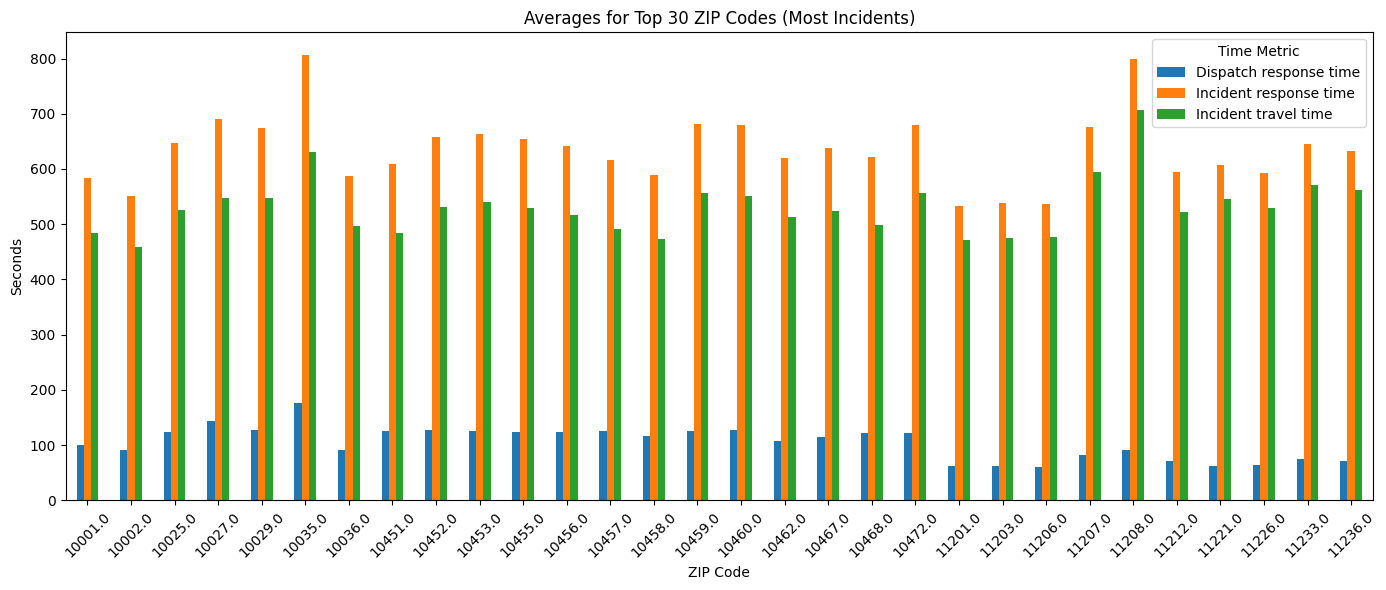

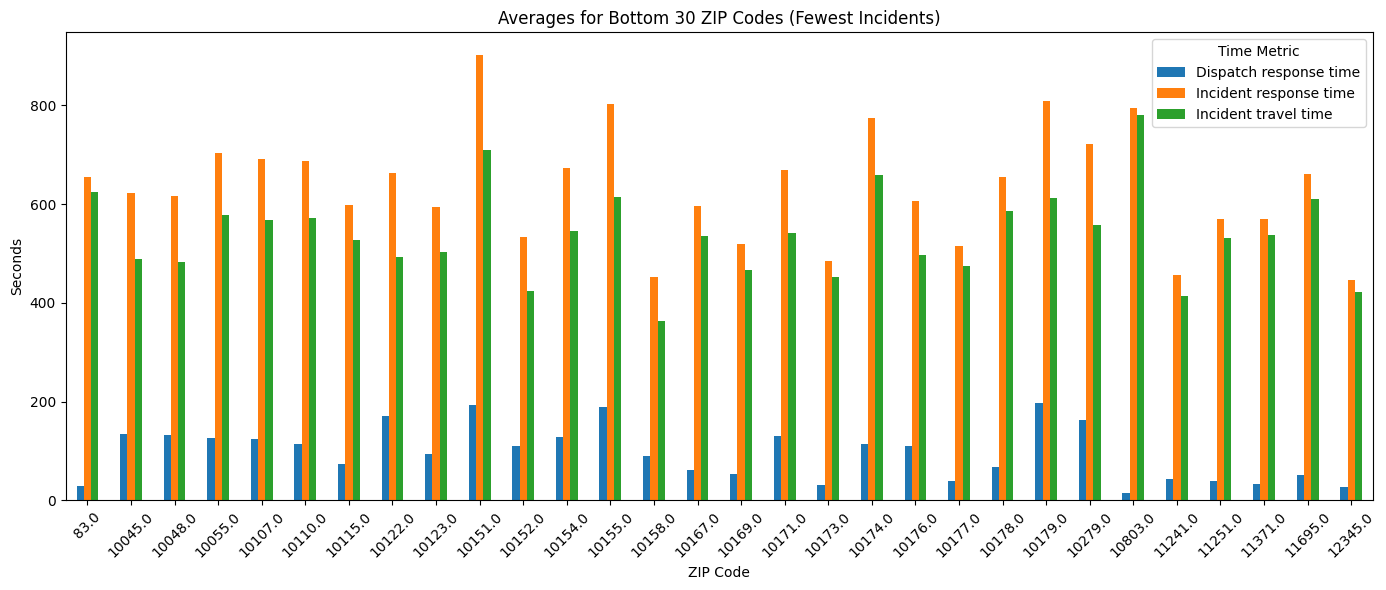

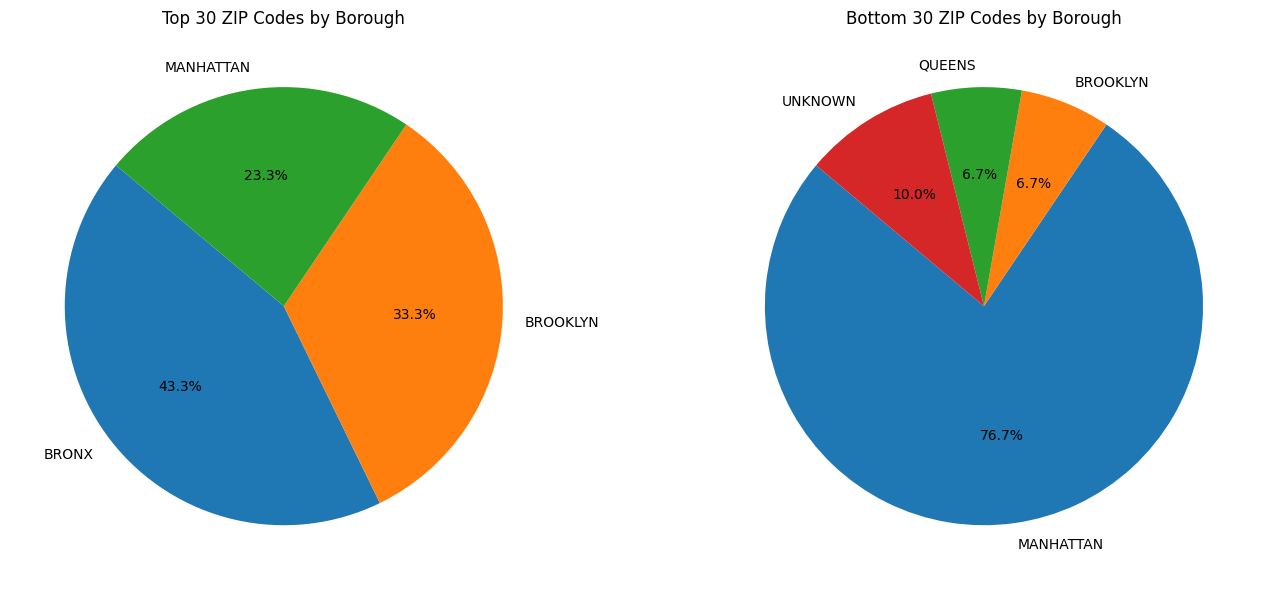

In [9]:

plt.figure(figsize=(10, 6))
plt.plot(borough_avg.index, borough_avg['DISPATCH_RESPONSE_SECONDS_QY'], marker='o', label='Dispatch response time')
plt.plot(borough_avg.index, borough_avg['INCIDENT_RESPONSE_SECONDS_QY'], marker='o', label='Incident response time')
plt.plot(borough_avg.index, borough_avg['INCIDENT_TRAVEL_TM_SECONDS_QY'], marker='o', label='Incident travel time')

plt.title("Averages by Borough")
plt.xlabel("Borough")
plt.ylabel("Time (Seconds)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Columns Renamed
column_rename_map = {
    'DISPATCH_RESPONSE_SECONDS_QY': 'Dispatch response time',
    'INCIDENT_RESPONSE_SECONDS_QY': 'Incident response time',
    'INCIDENT_TRAVEL_TM_SECONDS_QY': 'Incident travel time'
}

zip_avg_top30 = zip_avg_top30.rename(columns=column_rename_map)
zip_avg_bottom30 = zip_avg_bottom30.rename(columns=column_rename_map)

zip_avg_top30.plot(kind='bar', figsize=(14, 6))
plt.title("Averages for Top 30 ZIP Codes (Most Incidents)")
plt.xlabel("ZIP Code")
plt.ylabel("Seconds")
plt.xticks(rotation=45)
plt.legend(title="Time Metric")
plt.tight_layout()
plt.show()

zip_avg_bottom30.plot(kind='bar', figsize=(14, 6))
plt.title("Averages for Bottom 30 ZIP Codes (Fewest Incidents)")
plt.xlabel("ZIP Code")
plt.ylabel("Seconds")
plt.xticks(rotation=45)
plt.legend(title="Time Metric")
plt.tight_layout()
plt.show()

# Borough ZIP counts 
top_counts = {
    'BRONX': 13,
    'BROOKLYN': 10,
    'MANHATTAN': 7
}

bottom_counts = {
    'MANHATTAN': 23,
    'BROOKLYN': 2,
    'QUEENS': 2,
    'UNKNOWN': 3
}

# Pie charts


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].pie(top_counts.values(), labels=top_counts.keys(), autopct='%1.1f%%', startangle=140)
axes[0].set_title("Top 30 ZIP Codes by Borough")


axes[1].pie(bottom_counts.values(), labels=bottom_counts.keys(), autopct='%1.1f%%', startangle=140)
axes[1].set_title("Bottom 30 ZIP Codes by Borough")

plt.tight_layout()
plt.show()

## 3. Data Analysis

We discovered some interesting differences between the boroughs in New York City. For example, Staten Island had the fastest average times for dispatch, response, and travel. On the other hand Bronx and Manhattan had the slowest times. These big differences made us want to understand more about how each borough is doing. We also saw that most of the ZIP codes with a lot of incidents were in Bronx, Brooklyn, and Manhattan. Meanwhile, the ZIP codes with the fewest incidents were mostly in Manhattan. These patterns made us want to compare the boroughs more closely in the next parts of the project.

## 4. Genre

We decided to go with the magazine-style genre in which the style is centered with a constrained layout. For the visual narrative we had the platform be a consistent visual platform. For the narrative structure however we did use short captions and headlines and we did also have an introductory text as well as conclusion.


## 5. Visualizations

### 5.1: Heatmap for instances per year

One of our goals for this project was to examine the boroughs very thouroghly and that does in our opinion have to include an examination into the amount of instaces which have taken place for every neighborhood. One way to examine that is through a heatmap which gives a very clear picture for all of the firefighter action that has taken place through the years and how it is distributed throughout New York City. Also we have a heatmap for instances which have taken place per 100.000 residents.


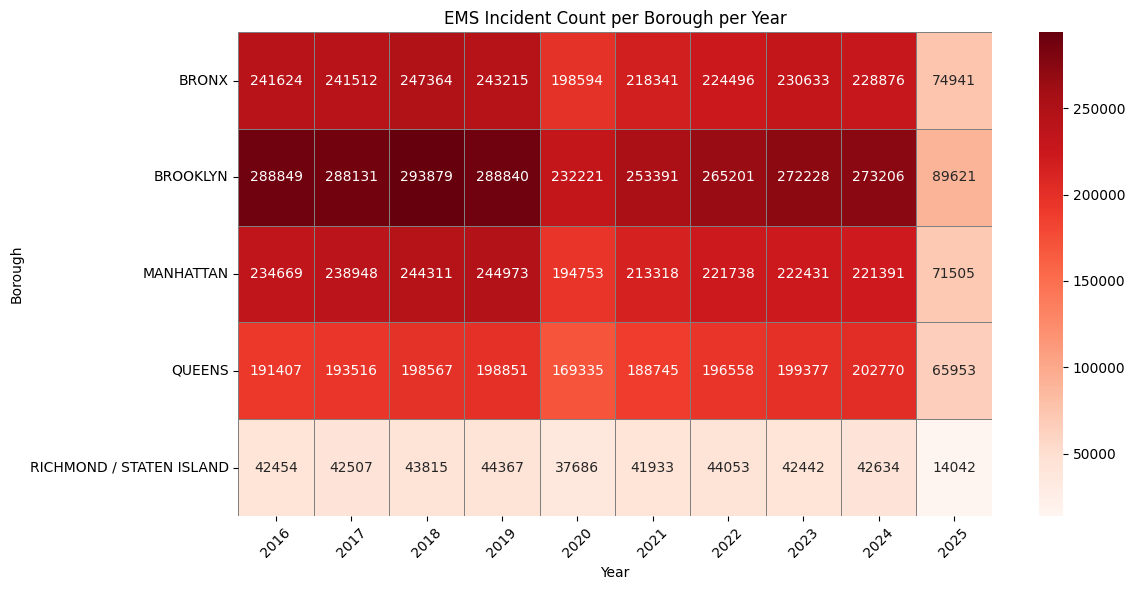

In [10]:
df = df[df["BOROUGH"] != "UNKNOWN"]
df["Year"] = df["INCIDENT_DATETIME"].dt.year

#  pivot table: rows = boroughs, columns = years, values = incident counts
heatmap_data = df.pivot_table(
    index="BOROUGH",
    columns="Year",
    values="INCIDENT_DATETIME",  # using any column to count rows
    aggfunc="count",
    fill_value=0
)

# Columns sorted
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Reds", linewidths=0.5, linecolor='gray')
plt.title("EMS Incident Count per Borough per Year")
plt.xlabel("Year")
plt.ylabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_7804\82337108.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17449.25342523131' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.loc[borough] = (
C:\Users\andre\AppData\Local\Temp\ipykernel_7804\82337108.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17441.165170821045' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.loc[borough] = (
C:\Users\andre\AppData\Local\Temp\ipykernel_7804\82337108.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17863.7764637574' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_data.loc[borough] = (
C:\U

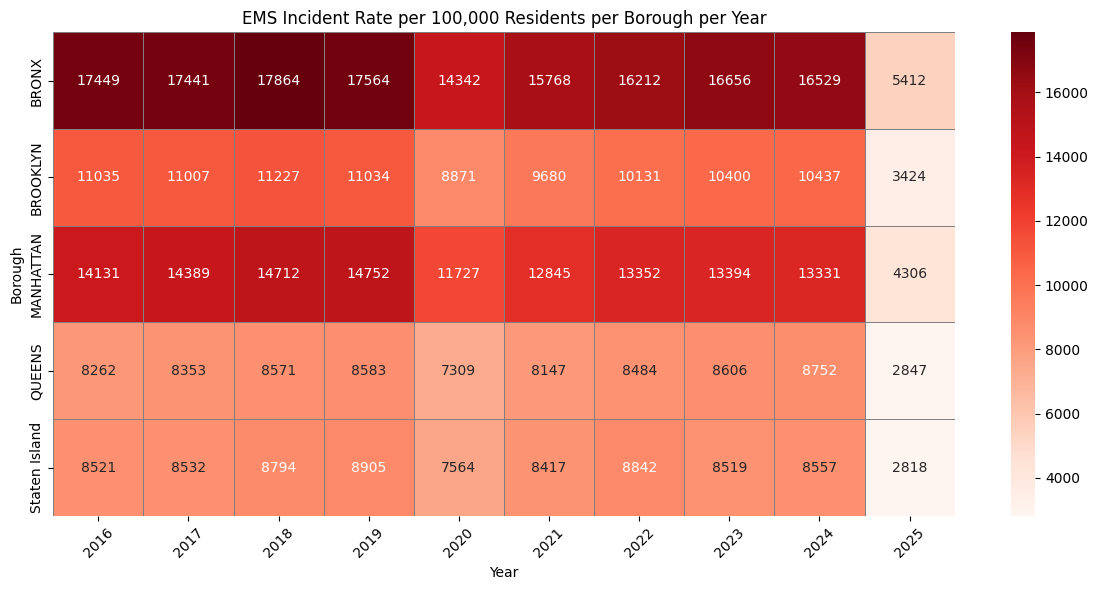

In [24]:

df = df[df["BOROUGH"] != "UNKNOWN"]
df["Year"] = df["INCIDENT_DATETIME"].dt.year

# Borough populations
population = {
    "BROOKLYN": 2617631,
    "QUEENS": 2316841,
    "MANHATTAN": 1660664,
    "BRONX": 1384724,
    "Staten Island": 498212
}

# pivot table of incident counts
heatmap_data = df.pivot_table(
    index="BOROUGH",
    columns="Year",
    values="INCIDENT_DATETIME",
    aggfunc="count",
    fill_value=0
)

# Normalize to per 100,000 people
for borough in heatmap_data.index:
    if borough in population:
        heatmap_data.loc[borough] = (
            heatmap_data.loc[borough] / population[borough]
        ) * 100000

# Sort columns (years)
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="Reds",
    linewidths=0.5,
    linecolor='gray'
)
plt.title("EMS Incident Rate per 100,000 Residents per Borough per Year")
plt.xlabel("Year")
plt.ylabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5.2 Bar charts

Another great tool we used for visualizing the data were two different types of bar charts, one which shows the amount of instances that have occured within the boroughs through the years, and another which shows the same information except per 100.000 residents. We thought these visualization would provide a clear picture for which boroughs are the safest in respect to this data for each year.

C:\Users\andre\AppData\Local\Temp\ipykernel_7804\2903214649.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


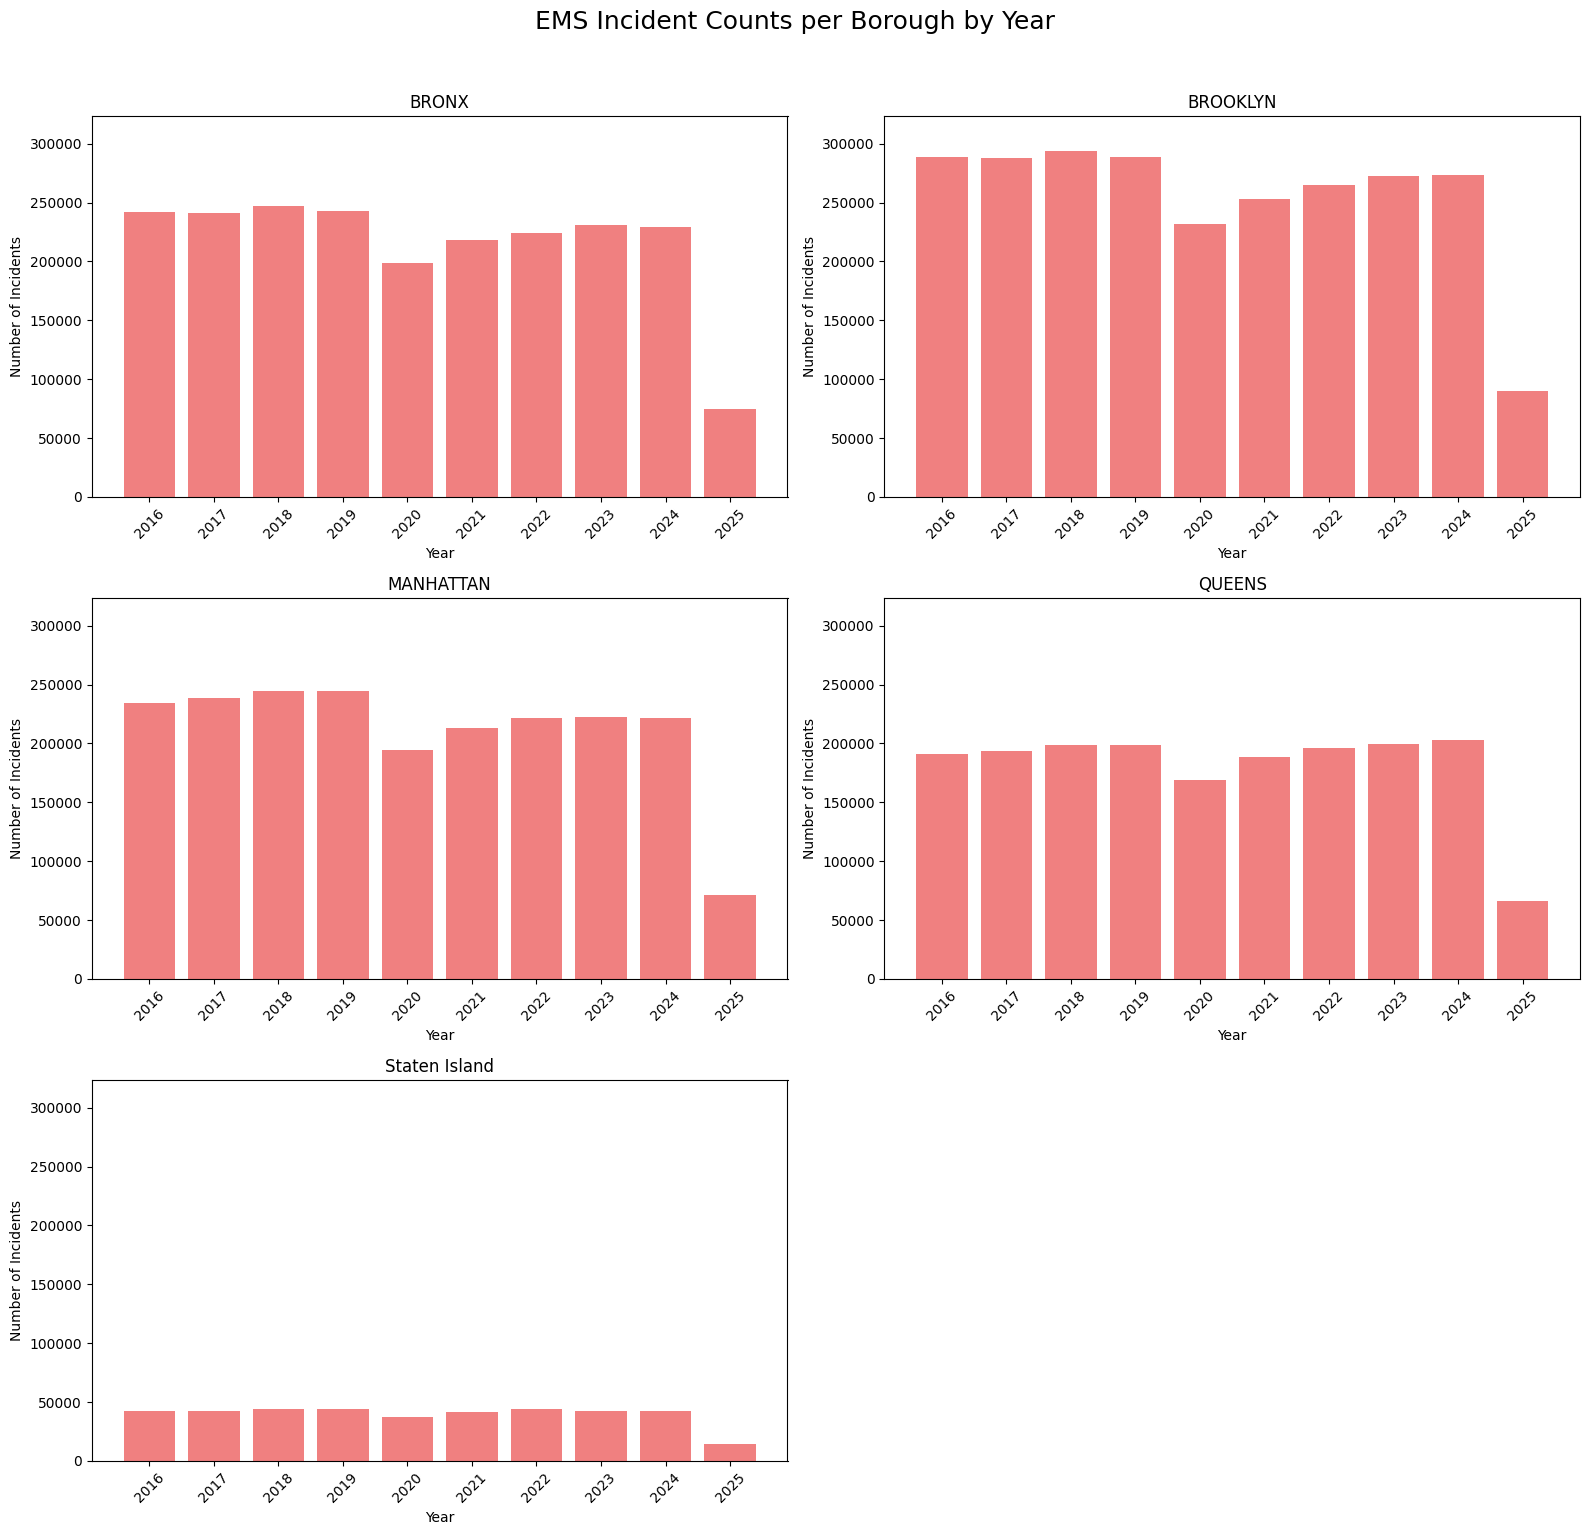

In [25]:

df["Year"] = df["INCIDENT_DATETIME"].dt.year
df = df[df["BOROUGH"] != "UNKNOWN"]

# Group by borough and year, count incidents
grouped = (
    df.groupby(["BOROUGH", "Year"])
    .size()
    .unstack(fill_value=0)
)

all_years = sorted(df["Year"].unique())
grouped = grouped.reindex(columns=all_years, fill_value=0)

# Sort boroughs alphabetically
boroughs = sorted(grouped.index)

# Get the global max count to use as common y-axis limit
y_max = grouped.max().max()

# Set up subplot grid
n_boroughs = len(boroughs)
n_cols = 2
n_rows = (n_boroughs + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

# Bar chart
for i, borough in enumerate(boroughs):
    axes[i].bar(all_years, grouped.loc[borough], color="lightcoral")
    axes[i].set_title(borough)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Number of Incidents")
    axes[i].set_xticks(all_years)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, y_max * 1.1)  
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.suptitle("EMS Incident Counts per Borough by Year", fontsize=18, y=1.02)
plt.tight_layout()

plt.savefig("figure_3.png", dpi=300, bbox_inches="tight")

C:\Users\andre\AppData\Local\Temp\ipykernel_7804\949910977.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17449.25342523131' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped.loc[borough] = (grouped.loc[borough] / population[borough]) * 100000
C:\Users\andre\AppData\Local\Temp\ipykernel_7804\949910977.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17441.165170821045' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped.loc[borough] = (grouped.loc[borough] / population[borough]) * 100000
C:\Users\andre\AppData\Local\Temp\ipykernel_7804\949910977.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17863.7764637574' has dtype incompatible wit

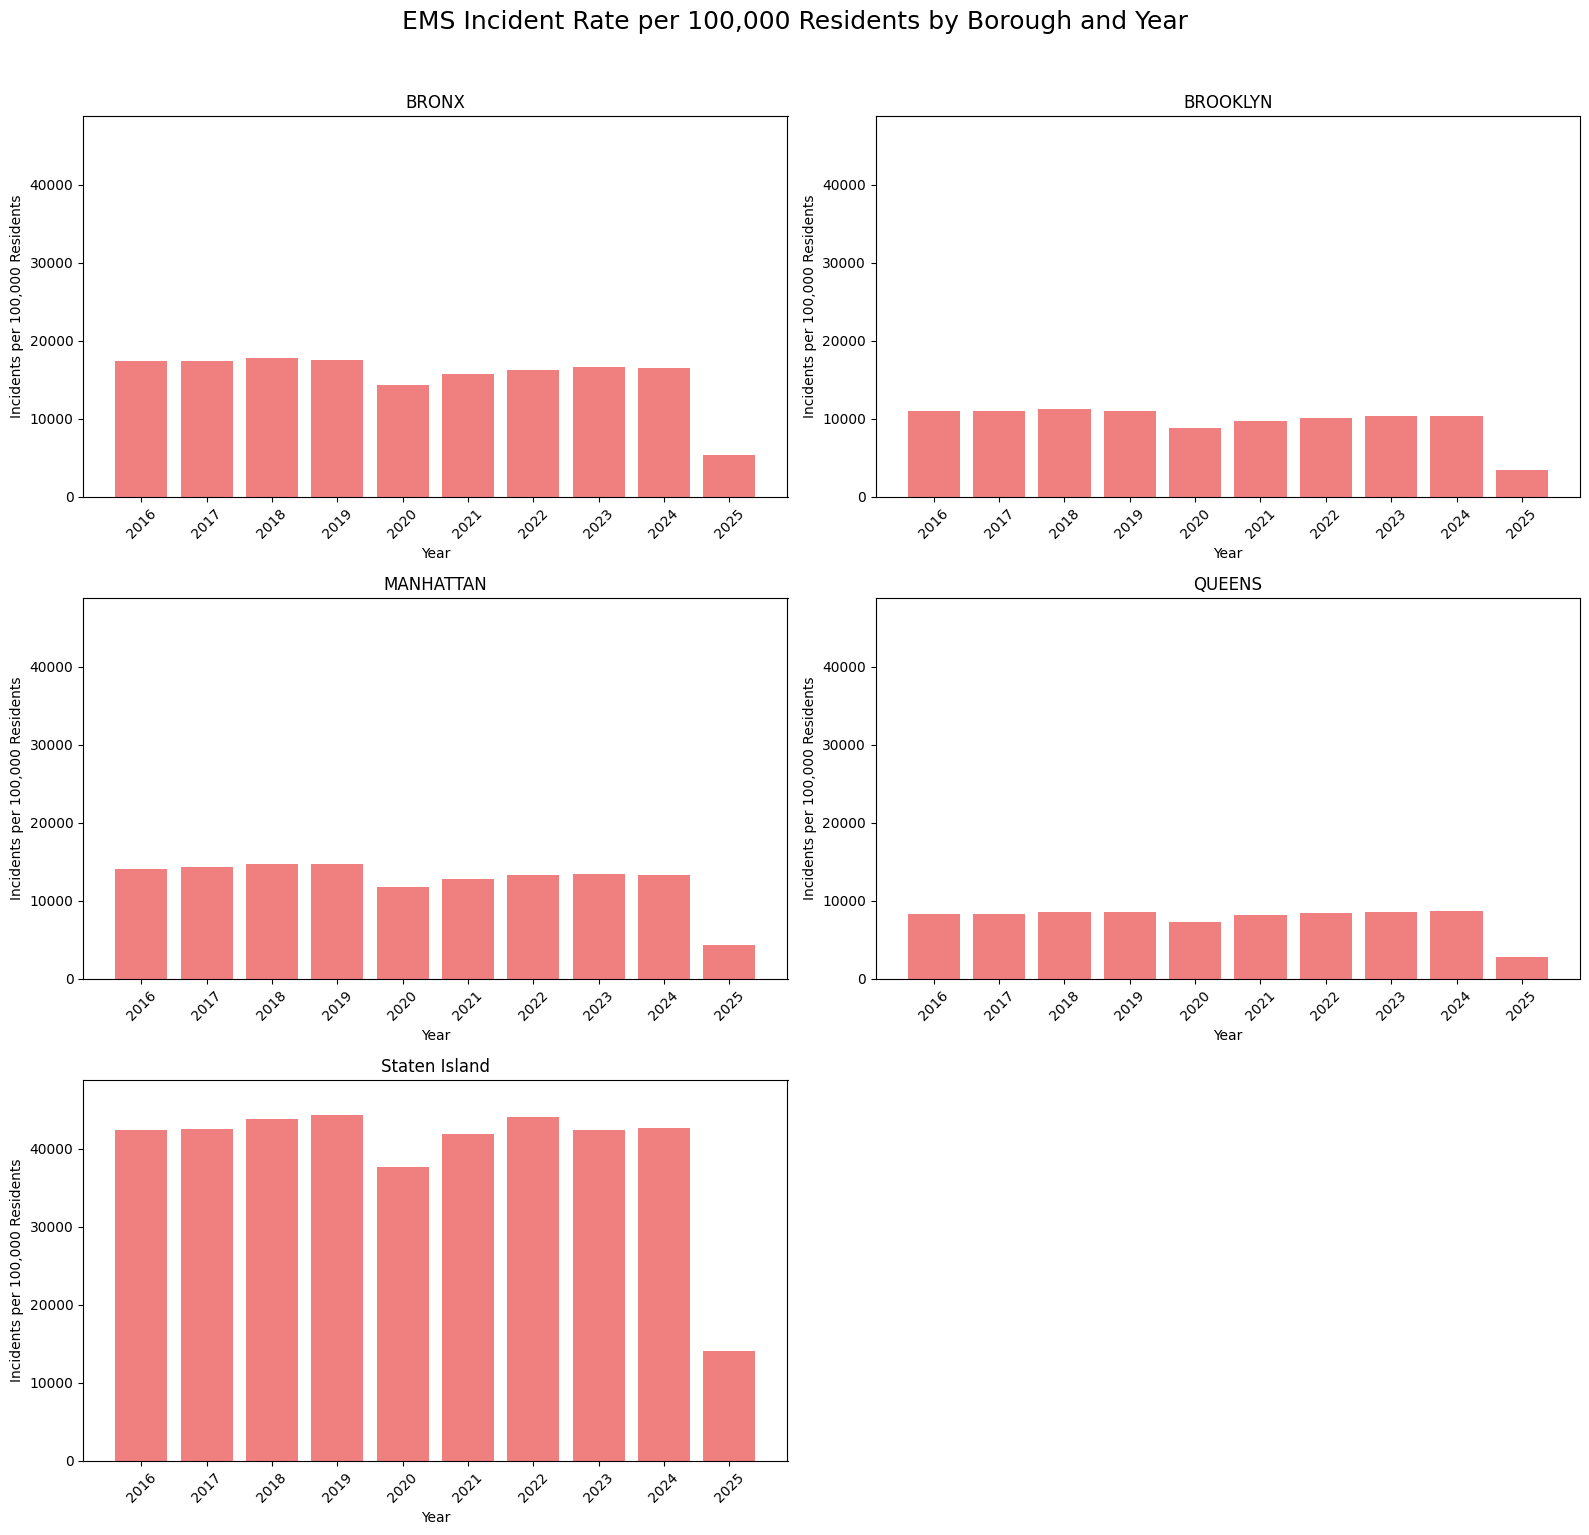

In [26]:
# Borough populations
population = {
    "BRONX": 1384724,
    "BROOKLYN": 2617631,
    "MANHATTAN": 1660664,
    "QUEENS": 2316841,
    "RICHMOND / STATEN ISLAND": 498212
}

df["Year"] = df["INCIDENT_DATETIME"].dt.year


df = df[df["BOROUGH"] != "UNKNOWN"]

# Group by borough and year, count incidents
grouped = (
    df.groupby(["BOROUGH", "Year"])
    .size()
    .unstack(fill_value=0)
)


all_years = sorted(df["Year"].unique())
grouped = grouped.reindex(columns=all_years, fill_value=0)

# Convert raw counts to per 100,000 residents
for borough in grouped.index:
    if borough in population:
        grouped.loc[borough] = (grouped.loc[borough] / population[borough]) * 100000

# Sort boroughs alphabetically
boroughs = sorted(grouped.index)

# Get the global max count to use as common y-axis limit
y_max = grouped.max().max()


n_boroughs = len(boroughs)
n_cols = 2
n_rows = (n_boroughs + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

# Bar chart
for i, borough in enumerate(boroughs):
    axes[i].bar(all_years, grouped.loc[borough], color="lightcoral")
    axes[i].set_title(f"{borough}")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Incidents per 100,000 Residents")
    axes[i].set_xticks(all_years)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, y_max * 1.1)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Title and layout
plt.suptitle("EMS Incident Rate per 100,000 Residents by Borough and Year", fontsize=18, y=1.02)
plt.tight_layout()

plt.savefig("figure_4.png", dpi=300, bbox_inches="tight")

### 5.3 Line plots

We used line plots to show the comparisons in dispatch response time, incident response time and travel time between the neighborhood. This way the end user can see very plainly how boroughs compare to each other in these critical areas.

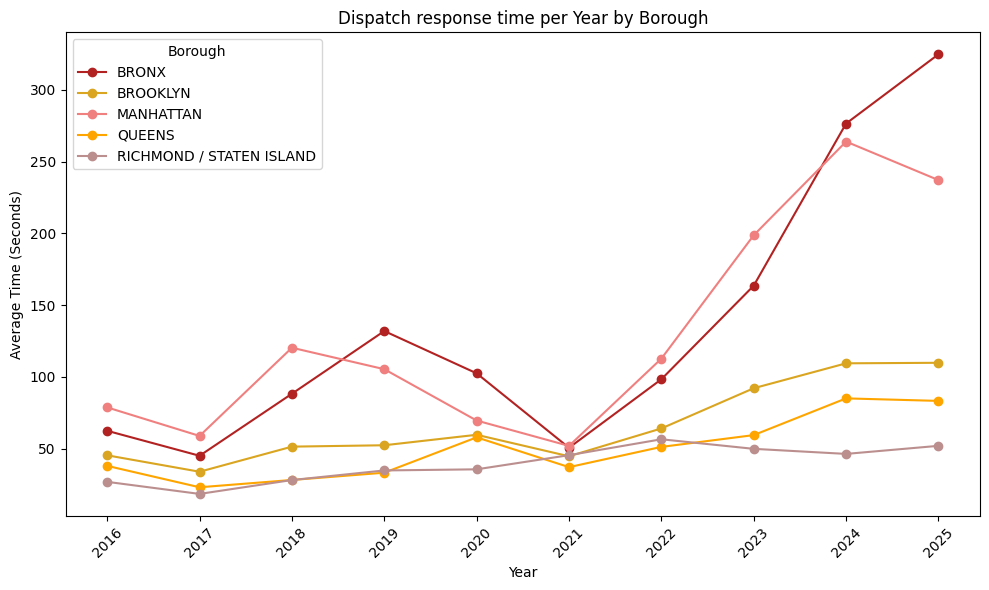

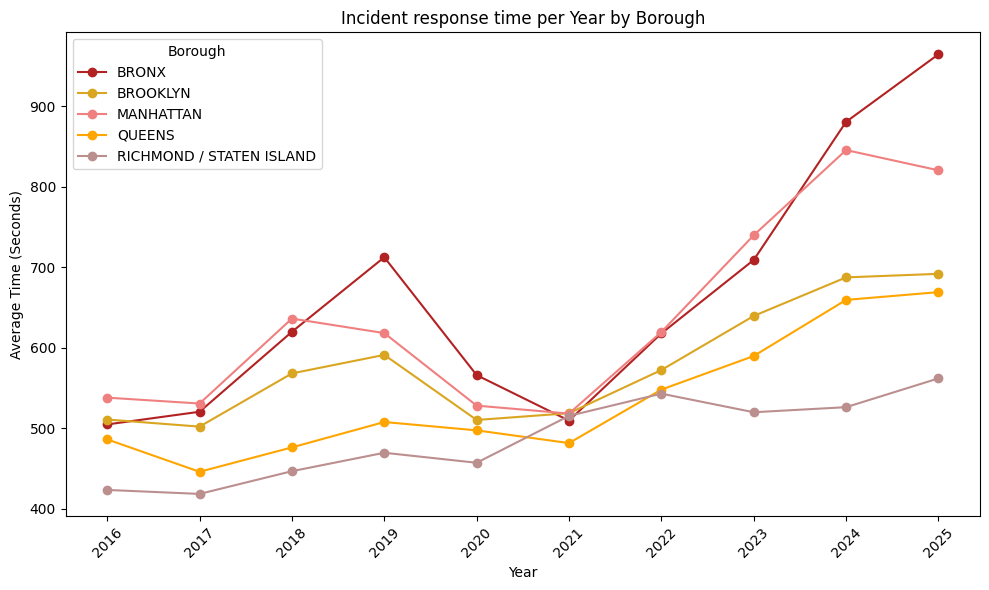

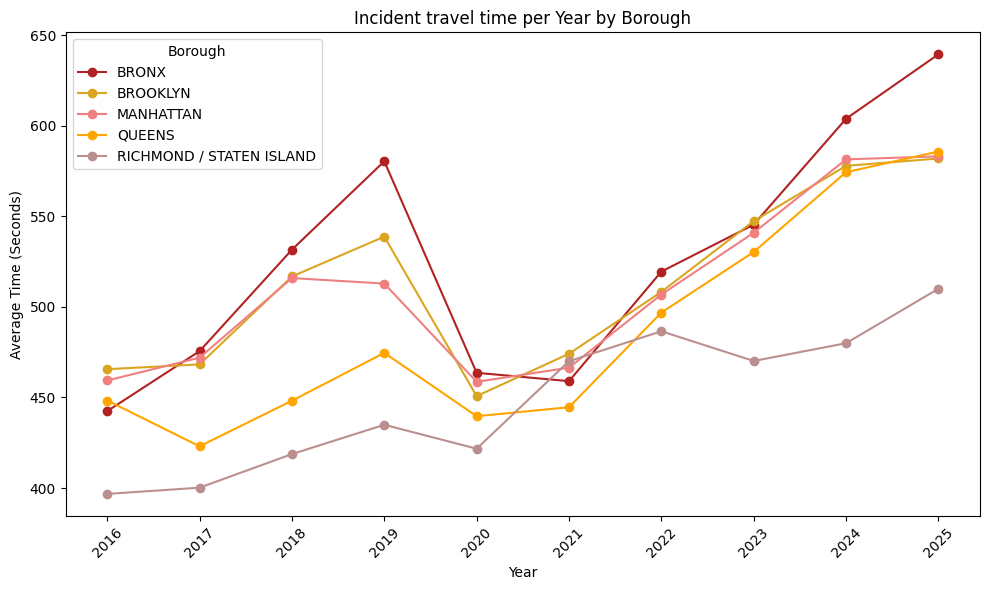

In [13]:

df["Year"] = df["INCIDENT_DATETIME"].dt.year
df = df[df["BOROUGH"] != "UNKNOWN"]

# columns and labels
time_cols = [
    'DISPATCH_RESPONSE_SECONDS_QY',
    'INCIDENT_RESPONSE_SECONDS_QY',
    'INCIDENT_TRAVEL_TM_SECONDS_QY'
]

labels = {
    'DISPATCH_RESPONSE_SECONDS_QY': 'Dispatch response time',
    'INCIDENT_RESPONSE_SECONDS_QY': 'Incident response time',
    'INCIDENT_TRAVEL_TM_SECONDS_QY': 'Incident travel time'
}


boroughs = sorted(df['BOROUGH'].unique())
borough_colors = {
    b: c for b, c in zip(
        boroughs,
        ['firebrick', 'goldenrod', 'lightcoral', 'orange', 'rosybrown']  # add more if needed
    )
}


all_years = sorted(df['Year'].unique())


for col in time_cols:
    plt.figure(figsize=(10, 6))

    # Group data
    yearly_avg = df.groupby(["Year", "BOROUGH"])[col].mean().unstack()

    # Plot each borough using its assigned color
    for borough in boroughs:
        plt.plot(
            all_years,
            yearly_avg[borough].reindex(all_years),
            marker='o',
            label=borough,
            color=borough_colors.get(borough, 'gray')  # fallback to gray if not defined
        )

    plt.title(f"{labels[col]} per Year by Borough")
    plt.xlabel("Year")
    plt.ylabel("Average Time (Seconds)")
    plt.xticks(all_years, rotation=45)
    plt.legend(title="Borough")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

## 5.4 Interactive plots

Here below is the code for the interactive plots which give the user a chance to play with a data in an engaging way. We normalize the data for the first plot so that each category from the line plots counts, equally, and then we perform a safety ranking for the neighborhoods. The second and third plot show two interactive bar charts. The first one shows how the boroughs rank against one antother in for various "severity levels" of the incidents that occur, while the second one simply shows how the boroughs rank against one another in terms of how many incidences occur there (per year)


In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, CheckboxGroup, CustomJS, Div
from bokeh.layouts import row, column


output_notebook()


df = df[df["BOROUGH"] != "UNKNOWN"]
df["Year"] = df["INCIDENT_DATETIME"].dt.year

metrics = [
    "DISPATCH_RESPONSE_SECONDS_QY",
    "INCIDENT_RESPONSE_SECONDS_QY",
    "INCIDENT_TRAVEL_TM_SECONDS_QY"
]

df = df.dropna(subset=metrics)


mean_per_year = df.groupby(["Year", "BOROUGH"])[metrics].mean().reset_index()
normalized = 1 - MinMaxScaler().fit_transform(mean_per_year[metrics])
mean_per_year_scaled = mean_per_year.copy()
mean_per_year_scaled[metrics] = normalized
mean_per_year_scaled["SafetyScore"] = mean_per_year_scaled[metrics].mean(axis=1)
mean_per_year_scaled["Rank"] = (
    mean_per_year_scaled.groupby("Year")["SafetyScore"]
    .rank(ascending=False, method="min")
)


pivot = mean_per_year_scaled.pivot(index="Year", columns="BOROUGH", values="Rank").sort_index()
years = list(pivot.index)
boroughs = list(pivot.columns)

data = {"Year": years}
for b in boroughs:
    data[b] = list(pivot[b])

source = ColumnDataSource(data=data)


p = figure(
    height=500,
    width=900,
    title="Borough Safety Rank per Year (1 = Safest)",
    x_axis_label="Year",
    y_axis_label="Safety Rank",
    tools="pan,box_zoom,reset,save"
)
p.y_range.flipped = True
p.xaxis.ticker = years
p.yaxis.ticker = list(range(1, len(boroughs) + 1))
p.xaxis.major_label_orientation = 0.8


custom_colors = ['firebrick', 'goldenrod', 'lightcoral', 'orange', 'rosybrown']
assert len(custom_colors) >= len(boroughs), "Not enough colors for the number of boroughs."

# Plot lines with custom colors
renderers = []
for i, b in enumerate(boroughs):
    r = p.line(x="Year", y=b, source=source, line_width=2, color=custom_colors[i])
    r.visible = False
    renderers.append(r)

# Checkbox for interactivity
checkbox = CheckboxGroup(labels=boroughs, active=[])
callback = CustomJS(args=dict(renderers=renderers, checkbox=checkbox), code="""
    const selected = new Set(checkbox.active);
    for (let i = 0; i < renderers.length; i++) {
        renderers[i].visible = selected.has(i);
    }
""")
checkbox.js_on_change("active", callback)

# Custom color legend
legend_html = "<b>Color Legend:</b><br><div style='line-height:1.6em;'>"
for i, b in enumerate(boroughs):
    legend_html += f"<span style='color:{custom_colors[i]}; font-weight:bold'>■</span> {b}<br>"
legend_html += "</div>"
legend = Div(text=legend_html, width=200)


layout = row(column(checkbox, legend), p)
show(layout)

from bokeh.embed import json_item
import json

with open("safety_rank_plot.json", "w") as f:
    json.dump(json_item(layout, "safety-rank-container"), f)

Loading BokehJS ...

In [28]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, CheckboxGroup, CustomJS
from bokeh.layouts import column
from bokeh.palettes import Category10
from bokeh.models import NumeralTickFormatter


output_notebook()


df = df[df["BOROUGH"] != "UNKNOWN"]


df["BOROUGH"] = df["BOROUGH"].replace({"RICHMOND / STATEN ISLAND": "STATEN ISLAND"})

df = df.dropna(subset=["FINAL_SEVERITY_LEVEL_CODE"])
df["FINAL_SEVERITY_LEVEL_CODE"] = df["FINAL_SEVERITY_LEVEL_CODE"].astype(int)

boroughs = sorted(df["BOROUGH"].unique())
severity_levels = sorted(df["FINAL_SEVERITY_LEVEL_CODE"].unique())

# Compute incident counts per borough per severity level
data_dict = {
    str(level): df[df["FINAL_SEVERITY_LEVEL_CODE"] == level]["BOROUGH"]
    .value_counts()
    .reindex(boroughs, fill_value=0)
    for level in severity_levels
}


initial_selected = [str(severity_levels[0])]
initial_counts = sum([data_dict[l] for l in initial_selected])

# Custom borough colors
custom_colors = ['firebrick', 'goldenrod', 'lightcoral', 'orange', 'rosybrown'][:len(boroughs)]

source = ColumnDataSource(data=dict(
    borough=boroughs,
    count=initial_counts.values,
    color=custom_colors
))


p = figure(
    x_range=boroughs,
    height=400,
    title=f"Total Incidents by Borough",
    toolbar_location=None,
    tools=""
)
p.vbar(x='borough', top='count', width=0.7, source=source, fill_color='color')
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = "Borough"
p.yaxis.axis_label = "Number of Incidents"
p.yaxis.formatter = NumeralTickFormatter(format="0,0")


checkbox = CheckboxGroup(labels=[str(l) for l in severity_levels], active=[0])

# Prepare JS-safe static data dict
js_data_dict = {
    str(level): {b: int(data_dict[str(level)][b]) for b in boroughs}
    for level in severity_levels
}

checkbox_callback = CustomJS(args=dict(source=source, checkbox=checkbox), code=f"""
    const raw = {js_data_dict};
    const selected = checkbox.active.map(i => checkbox.labels[i]);

    const boroughs = source.data['borough'];
    const new_counts = Array(boroughs.length).fill(0);

    for (let level of selected) {{
        const levelData = raw[level];
        for (let i = 0; i < boroughs.length; i++) {{
            new_counts[i] += levelData[boroughs[i]];
        }}
    }}

    source.data['count'] = new_counts;
    source.change.emit();
""")

checkbox.js_on_change("active", checkbox_callback)


layout = column(checkbox, p)
show(layout)


df["BOROUGH"] = df["BOROUGH"].replace({"STATEN ISLAND": "RICHMOND / STATEN ISLAND"})

with open("severity_plot.json", "w") as f:
    json.dump(json_item(layout, "severity-plot-container"), f)

Loading BokehJS ...

In [29]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, CustomJS, Select, NumeralTickFormatter
from bokeh.layouts import column
from bokeh.palettes import Category10


output_notebook()


df = df[df["BOROUGH"] != "UNKNOWN"]
df["BOROUGH"] = df["BOROUGH"].replace({"RICHMOND / STATEN ISLAND": "Staten Island"})
df["Year"] = df["INCIDENT_DATETIME"].dt.year


boroughs = ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'Staten Island']
years = sorted(df["Year"].dropna().unique().astype(int))
custom_colors = ['firebrick', 'goldenrod', 'lightcoral', 'orange', 'rosybrown']


year_data = {
    str(year): [int(df[(df["Year"] == year) & (df["BOROUGH"] == b)].shape[0]) for b in boroughs]
    for year in years
}


initial_year = str(years[0])
initial_counts = year_data[initial_year]

source = ColumnDataSource(data=dict(
    borough=boroughs,
    count=initial_counts,
    color=custom_colors
))


p = figure(
    y_range=boroughs,
    height=400,
    width=650,
    title=f"Total EMS Incidents by Borough - {initial_year}",
    x_axis_label="Total Incidents",
    tools="hover",
    tooltips="@borough: @count"
)

p.hbar(y="borough", right="count", height=0.6, source=source, fill_color="color")
p.xaxis[0].formatter = NumeralTickFormatter(format="0,0")
p.x_range.start = 0
p.ygrid.grid_line_color = None
p.xaxis.axis_label_text_font_size = "10pt"
p.yaxis.axis_label_text_font_size = "10pt"


year_select = Select(title="Select Year", value=initial_year, options=[str(y) for y in years])


callback = CustomJS(args=dict(source=source, select=year_select), code=f"""
    const data = source.data;
    const year = select.value;

    const full_data = {year_data};

    data['count'] = full_data[year];
    source.change.emit();
""")

year_select.js_on_change("value", callback)


layout = column(year_select, p)
show(layout)

with open("last_plot.json", "w") as f:
    json.dump(json_item(layout, "last-plot-container"), f)

Loading BokehJS ...

## 6. Discussion

We are generally fairly pleased with how the assignment went and we think that the data was visualized and presented in an effective manner which in turn will give the end user a fairly accurate overview for the New York firefighter scene. Like has been mentioned before the dataset is very vast and contains a lot more information then we were able to present in this project. For example we decided to limit us to an analyzis of the boroughs but the data does contain information about the ZIP-codes as well so there would definitely be potential for going into further detail and examine the neighborhoods (perhaps an interactive map). Also it should be mentioned that the data does categorize the calls into call type, suc as "SICK", "UNC" (meaning unconcious) and so fourth. We were really interested in exploring that further but a lot of the categories had unclear names (most of them), so were not able to do that. However by adding that to the data analysize the project could have perhapsed been ever better and given a clearer insight into the distrubution and variety of calls that the fire department in New York receives.

# 7. Contributions

Andrés (s242978): Took care of creating the website, and is responsible for the interactive plots.

Þorvaldur (s242975): Created the plots in the notebook and wrote most of the text that is found there.



## 8. References

The dataset that was used in this project can be found on the following website:

https://data.cityofnewyork.us/Public-Safety/EMS-Incident-Dispatch-Data/76xm-jjuj/about_data